In [1]:
from google_auth_oauthlib.flow import InstalledAppFlow
import gspread
import pandas as pd 
from google_auth_oauthlib.flow import InstalledAppFlow

# Define the scopes for accessing Google Sheets and Google Drive
SCOPES = ['https://www.googleapis.com/auth/spreadsheets', 'https://www.googleapis.com/auth/drive']

# Create the flow using the scopes
flow = InstalledAppFlow.from_client_secrets_file(
    'sheets.json',
    scopes=SCOPES
)

# Run the flow and obtain credentials
credentials = flow.run_local_server()

# Authorize the client using the credentials
client = gspread.authorize(credentials)

# Open the spreadsheet by its title
spreadsheet = client.open('test')

# Access the first (and only) worksheet in the spreadsheet
worksheet = spreadsheet.get_worksheet(0)  # Assuming it's the first (index 0) worksheet

# Get all values from the worksheet
records = worksheet.get_all_records()

# Convert the data to a Pandas DataFrame
df = pd.DataFrame(records)

# Now you can work with the data as a Pandas DataFrame
print(df)

Please visit this URL to authorize this application: https://accounts.google.com/o/oauth2/auth?response_type=code&client_id=378386978603-h3kj3ge0e2mt6kj8s3r9jk4q5fffqv0t.apps.googleusercontent.com&redirect_uri=http%3A%2F%2Flocalhost%3A8080%2F&scope=https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fspreadsheets+https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive&state=IRzEEreuTc5FZt8csTq2QNAwdfjs2O&access_type=offline


KeyboardInterrupt: 

## Retreiving Data  
##### Adding Day & Number of Week

In [2]:
import pandas as pd
import re
import openpyxl
from collections import Counter
import matplotlib.pyplot as plt
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.ticker as ticker
from bokeh.plotting import figure, show
from bokeh.io import output_notebook
from bokeh.models import Label
from bokeh.models import ColumnDataSource
from bokeh.transform import dodge
from bokeh.io import output_notebook
from bokeh.models import NumeralTickFormatter
import jdatetime
import pandas as pd
import random
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt





sale = pd.read_excel("/Users/mohammad/XAV/Departemant Sale/Project / فروش 1400.xlsx", sheet_name="فروش")
city_1402_df = pd.read_excel("/Users/mohammad/XAV/Departemant Sale/Project /طرف حساب 1402.xlsx")
sale_1402 = pd.read_excel("/Users/mohammad/XAV/Departemant Sale/Project /فروش نيمه اول 1402.xlsx", sheet_name="فروش")
sale_1401 = pd.read_excel("/Users/mohammad/XAV/Departemant Sale/Project /فروش 1401.xlsx", sheet_name="فروش")
sale_1400 = pd.read_excel("/Users/mohammad/XAV/Departemant Sale/Project / فروش 1400.xlsx", sheet_name="فروش")

sale_1400["مقدار-فرعي"].fillna(0, inplace=True)
sale_1401["مقدار-فرعي"].fillna(0, inplace=True)
sale_1402["مقدار-فرعي"].fillna(0, inplace=True)


# sale_1402['gregorian_date'] = sale_1402["تاريخ"].apply(lambda x: jdatetime.datetime.strptime(x, '%Y/%m/%d').togregorian().strftime('%Y-%m-%d'))
# # Convert the gregorian_date column to datetime
# sale_1402['gregorian_date'] = pd.to_datetime(sale_1402['gregorian_date'])
# # Find the day of the week
# sale_1402['روز'] = sale_1402['gregorian_date'].dt.day_name()


# sale_1401['gregorian_date'] = sale_1401["تاريخ"].apply(lambda x: jdatetime.datetime.strptime(x, '%Y/%m/%d').togregorian().strftime('%Y-%m-%d'))
# # Convert the gregorian_date column to datetime
# sale_1401['gregorian_date'] = pd.to_datetime(sale_1401['gregorian_date'])
# # Find the day of the week
# sale_1401['روز'] = sale_1401['gregorian_date'].dt.day_name()


# sale_1400['gregorian_date'] = sale_1400["تاريخ"].apply(lambda x: jdatetime.datetime.strptime(x, '%Y/%m/%d').togregorian().strftime('%Y-%m-%d'))
# # Convert the gregorian_date column to datetime
# sale_1400['gregorian_date'] = pd.to_datetime(sale_1400['gregorian_date'])
# # Find the day of the week
# sale_1400['روز'] = sale_1400['gregorian_date'].dt.day_name()

# data = {'persian_date': sale_1400["تاريخ"]}
# df = pd.DataFrame(data)
# sale_1400['week_of_year'] = sale_1400['تاريخ'].apply(lambda x: jdatetime.date(int(x.split('/')[0]), int(x.split('/')[1]), int(x.split('/')[2])).strftime('%W'))

# data = {'persian_date': sale_1401["تاريخ"]}
# df = pd.DataFrame(data)
# sale_1401['week_of_year'] = sale_1401['تاريخ'].apply(lambda x: jdatetime.date(int(x.split('/')[0]), int(x.split('/')[1]), int(x.split('/')[2])).strftime('%W'))

# data = {'persian_date': sale_1402["تاريخ"]}
# df = pd.DataFrame(data)
# sale_1402['week_of_year'] = sale_1402['تاريخ'].apply(lambda x: jdatetime.date(int(x.split('/')[0]), int(x.split('/')[1]), int(x.split('/')[2])).strftime('%W'))

# adding Day and Week to Df

def persian_week(df):
    df["week"] = None
    for i in range(len(df)):
        mah = int(df.loc[i,"ماه"])
        rooz = int(df.loc[i,"تاريخ"][-2:])

        # Farvardin
        if mah == 1:
            if rooz<=7 :
                df.loc[i,"week"] = 1 
            elif rooz >= 8 and rooz <= 14:
                df.loc[i,"week"] = 2 

            elif rooz >= 15 and rooz<=21:
                df.loc[i,"week"] = 3 

            elif rooz >= 22 and rooz <=28:
                df.loc[i,"week"] = 4 

            elif rooz >=29:
                df.loc[i,"week"] = 5

        # Ordibehesht
        elif mah == 2:
            if rooz <= 4:
                df.loc[i,"week"] = 5

            elif rooz >= 5 and rooz<= 11:
                df.loc[i,"week"] = 6

            elif rooz >=12 and rooz<=18:
                df.loc[i,"week"] = 7

            elif rooz >=19 and rooz <=25:
                df.loc[i,"week"] = 8

            elif rooz>=26:
                df.loc[i,"week"] = 9 

        # Khordad
        elif mah == 3:
            if rooz == 1:
                df.loc[i,"week"] = 9

            elif rooz >=2 and rooz<=8:
                df.loc[i,"week"] = 10

            elif rooz>= 9 and rooz <= 15:
                df.loc[i,"week"] = 11

            elif rooz >= 16 and rooz <= 22:
                df.loc[i,"week"] = 12

            elif rooz >= 23 and rooz <= 29:
                df.loc[i,"week"] = 13

            elif rooz>=30:
                df.loc[i,"week"] = 14

        # Tir
        elif mah == 4:
            if rooz<= 5 :
                df.loc[i,"week"] = 14

            elif rooz >= 6 and rooz <= 12 :
                df.loc[i,"week"] = 15

            elif rooz>=13 and rooz <= 19:
                df.loc[i,"week"] = 16

            elif rooz >=20  and rooz<= 26:
                df.loc[i,"week"] = 17

            elif rooz>= 27:
                df.loc[i,"week"] = 18

        # Mordad
        elif mah == 5:
            if rooz <= 2 :
                df.loc[i,"week"] = 18   

            elif rooz >= 3 and rooz<= 9:
                df.loc[i,"week"] = 19

            elif rooz >=10 and rooz<= 16:
                df.loc[i,"week"] = 20

            elif rooz >= 17 and rooz <= 23:
                df.loc[i,"week"] = 21

            elif rooz >= 24 and rooz <= 30:
                df.loc[i,"week"] = 22

            elif rooz == 31 :
                df.loc[i,"week"] = 23

        # Shahrivar 
        elif mah == 6 :
            if rooz <= 6 :
                df.loc[i,"week"] = 23

            elif rooz >= 7 and rooz <= 13:
                df.loc[i,"week"] = 24

            elif rooz >= 14 and rooz<= 20 :
                df.loc[i,"week"] = 25

            elif rooz >= 21 and rooz <= 27:
                df.loc[i,"week"] =   26

            elif rooz >=28:
                df.loc[i,"week"] = 27


        # Mehr 
        elif mah == 7 :
            if rooz <= 3:
                df.loc[i,"week"] = 27

            elif rooz >= 4 and rooz <= 10:
                df.loc[i,"week"] = 28
        
            elif rooz >= 11 and rooz <= 17:
                df.loc[i,"week"] = 29

            elif rooz >= 18 and rooz <= 24:
                df.loc[i,"week"] = 30

            elif rooz >= 25:
                df.loc [i,"week"] = 31

        # Aban
        elif mah == 8:
            if rooz == 1:
                df.loc[i,"week"] = 31

            elif rooz >=2 and rooz<=8:
                df.loc[i,"week"] = 32

            elif rooz>= 9 and rooz <= 15:
                df.loc[i,"week"] = 33

            elif rooz >= 16 and rooz <= 22:
                df.loc[i,"week"] = 34

            elif rooz >= 23 and rooz <= 29:
                df.loc[i,"week"] = 35

            elif rooz>=30:
                df.loc[i,"week"] = 36


        #  Azar
        elif mah == 9:
            if rooz <= 6 :
                df.loc[i,"week"] = 36

            elif rooz >= 7 and rooz <= 13:
                df.loc[i,"week"] = 37

            elif rooz >= 14 and rooz<= 20 :
                df.loc[i,"week"] = 38

            elif rooz >= 21 and rooz <= 27:
                df.loc[i,"week"] =   39

            elif rooz >=28:
                df.loc[i,"week"] = 40

        # Dey
        elif mah == 10:
            if rooz <= 4:
                df.loc[i,"week"] = 40

            elif rooz >= 5 and rooz<= 11:
                df.loc[i,"week"] = 41

            elif rooz >=12 and rooz<=18:
                df.loc[i,"week"] = 42

            elif rooz >=19 and rooz <=25:
                df.loc[i,"week"] = 43

            elif rooz>=26:
                df.loc[i,"week"] = 44

        # Bahman
        elif mah == 11:
            if rooz <= 2 :
                df.loc[i,"week"] = 44   

            elif rooz >= 3 and rooz<= 9:
                df.loc[i,"week"] = 45

            elif rooz >=10 and rooz<= 16:
                df.loc[i,"week"] = 46

            elif rooz >= 17 and rooz <= 23:
                df.loc[i,"week"] = 47

            elif rooz >= 24 and rooz <= 30:
                df.loc[i,"week"] = 48


        elif mah == 12:
            if rooz <= 7 :
                df.loc[i,"week"] = 49

            elif rooz >= 8 and rooz<= 14:
                df.loc[i,"week"] = 50

            elif rooz >= 15 and rooz <=21 :
                df.loc[i,"week"] = 51

            else:
                df.loc[i,"week"] = 52 

    return df

sale_1400 = persian_week(sale_1400)
sale_1401 = persian_week(sale_1401)
sale_1402 = persian_week(sale_1402)


# renaming Goods

def extract_persian_name(input_string):
    persian_pattern = r'[\u0600-\u06FF\s]+'
    persian_name = re.findall(persian_pattern, input_string)
    persian_name = ' '.join(persian_name)
    return persian_name

# Apply the function to each row of the name column
sale_1400['كالا/خدمت'] = sale_1400['كالا/خدمت'].apply(extract_persian_name)
sale_1401['كالا/خدمت'] = sale_1401['كالا/خدمت'].apply(extract_persian_name)
sale_1402['كالا/خدمت'] = sale_1402['كالا/خدمت'].apply(extract_persian_name)

def modify_string(text):
    if isinstance(text, str) and "مركزي" in text:
        modified_text = text.replace("مركزي", "").split()
        modified_text = " ".join(modified_text)
        return modified_text
    else:
        return text
city_1402_df["شهر"] = city_1402_df["شهر"].apply(modify_string)

def city(sale,city_df): 
    city_dict = {}
    for i in range(len(city_df)):
        code = city_df.loc[i, "كد"]
        customer_city = city_df.loc[i, "شهر"]
        city_dict[code] = customer_city

    sale["شهر"] = None
    for i in range(len(sale)):
        try:
            code = sale.loc[i, "كد مشتري"]
            sale.loc[i,"شهر"] = city_dict[code]
        except:
            continue
    return sale

sale_1400 = city(sale_1400, city_1402_df)
sale_1401 = city(sale_1401, city_1402_df)
sale_1402 = city(sale_1402, city_1402_df)
sale_1402


,نوع سند,شماره,تاريخ,كد مشتري,مشتري,نام مشتري,گروه مشتري,كد گروه مشتري,نوع فروش,كد كالا/خدمت,...,مقدار-اصلي,مقدار-فرعي,واحد فرعي,في,مبلغ فروش,تخفيف,خالص,ماه,week,شهر
0,فاكتور,6,1402/01/05,21873,يو كافي (شايان شريفي),يو كافي (شايان شريفي),كافه و رستوران,2.0,قهوه و لوازم جانبي,5505.3,...,4.0,16000.0,گرم,26800000,107200000,0,107200000,1,1,مرودشت
1,فاكتور,7,1402/01/05,21470,كافه يوتا (ماتيار منصوري),كافه يوتا (ماتيار منصوري),كافه و رستوران,2.0,قهوه و لوازم جانبي,5505.3,...,2.0,8000.0,گرم,26800000,53600000,0,53600000,1,1,كرج
2,فاكتور,8,1402/01/05,20558,كافه آندورا (محمد درخشان),كافه آندورا (علي بختياري),كافه و رستوران,2.0,قهوه و لوازم جانبي,5501.3,...,1.0,4000.0,گرم,27200000,27200000,0,27200000,1,1,تهران
3,فاكتور,9,1402/01/05,20546,كافه راوي (معين الهيان),كافه راوي (معين الهيان),كافه و رستوران,2.0,قهوه و لوازم جانبي,5501.3,...,2.0,8000.0,گرم,27200000,54400000,0,54400000,1,1,كرمان
4,فاكتور,10,1402/01/05,22028,كافه وان اند اونلي (حسين نعمتي),كافه وان اند اونلي (حسين نعمتي),كافه و رستوران,2.0,قهوه و لوازم جانبي,5516.1,...,2.0,300.0,گرم,1650000,3300000,0,3300000,1,1,تهران
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13086,فاكتور,6524,1402/10/28,22374,علي شاه حسيني ( پرسنل ),علي شاه حسيني ( پرسنل ),اشخاص,1.0,قهوه و لوازم جانبي,3311.3,...,1.0,40.0,كيلوگرم,950000,950000,-142500,807500,10,44,NaN
13087,فاكتور,6524,1402/10/28,22374,علي شاه حسيني ( پرسنل ),علي شاه حسيني ( پرسنل ),اشخاص,1.0,قهوه و لوازم جانبي,3311.1,...,1.0,150.0,گرم,3050000,3050000,-457500,2592500,10,44,NaN
13088,فاكتور,6525,1402/10/28,23754,نازنين عطارها,نازنين عطارها,NaN,NaN,قهوه و لوازم جانبي,3318.1,...,4.0,600.0,كيلوگرم,4150000,16600000,0,16600000,10,44,None
13089,فاكتور,6526,1402/10/28,20001,هاني درجزيني (پرسنل),هاني درجزيني (پرسنل),اشخاص,1.0,قهوه و لوازم جانبي,1122.3,...,1.0,40.0,گرم,2650000,2650000,-397500,2252500,10,44,NaN


## Creating Weekly Report

In [27]:
week_number = int(input("Which week do you want to get report?  "))
last_week_number = week_number - 1

this_week_df = sale_1402[sale_1402["week"] == week_number]
last_week_df = sale_1402[sale_1402["week"] == last_week_number]
last_year_week_df = sale_1401[sale_1401["week"]== week_number]




##### Each Series Sale in Each Day

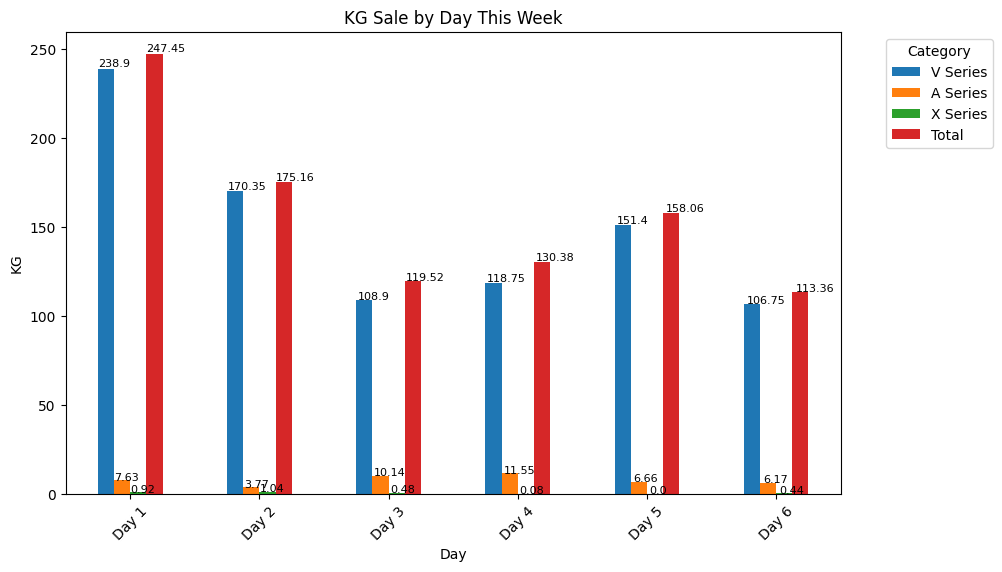

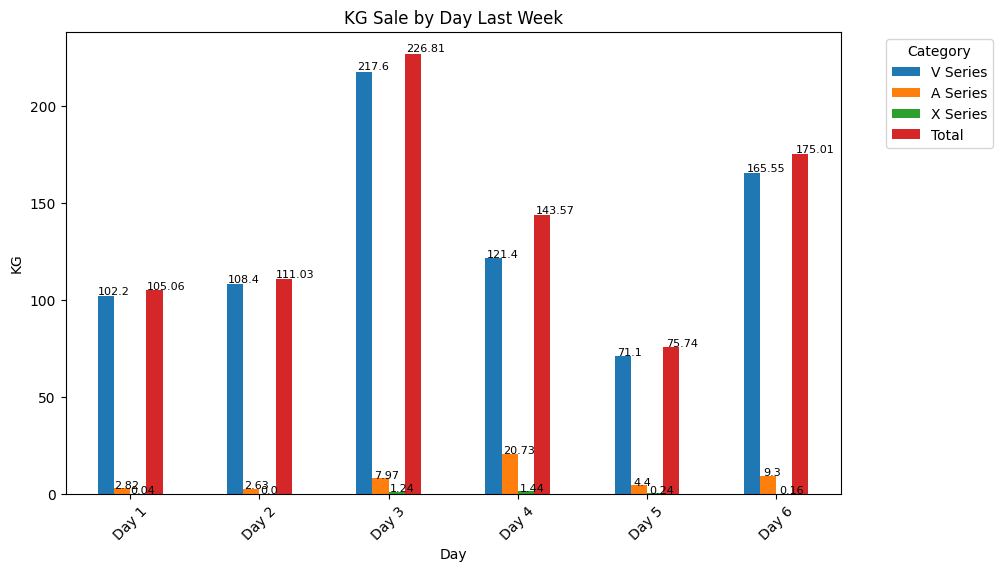

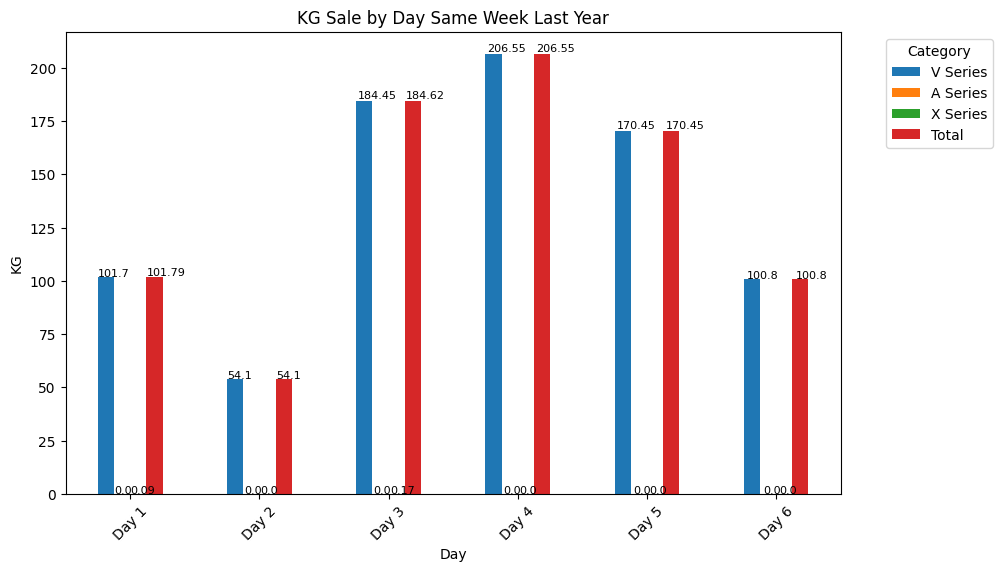

In [28]:

from bokeh.plotting import figure, show
from bokeh.io import output_notebook
from bokeh.models import ColumnDataSource
from bokeh.transform import dodge
def each_day(week_df, string):
    day = 1
    day_dict = {}
    for i in set(week_df["تاريخ"].to_list()):
        df = week_df[week_df["تاريخ"]== i]
        sum_v = round(sum(df[df["گروه فروش"]== "V Series"]["مقدار-فرعي"].to_list())/1000,2)
        sum_a = round(sum(df[df["گروه فروش"]== "A Series"]["مقدار-فرعي"].to_list())/1000,2)
        sum_x = round(sum(df[df["گروه فروش"]== "X Series"]["مقدار-فرعي"].to_list())/1000,2)
        day_dict[f"Day {day}"] = {"V Series": sum_v, "A Series": sum_a, "X Series": sum_x, "Total": round(sum_x+sum_a+sum_v,2)}
        day+=1

# Sample data
    # data = {
    #     'days': ['Day 1', 'Day 2', 'Day 3', 'Day 4', 'Day 5'] * 4,
    #     'category': ['X', 'A', 'V', 'Total'] * 5,
    #     'revenue': [day_dict["Day 1"]["X Series"], day_dict["Day 1"]["A Series"], day_dict["Day 1"]["V Series"], day_dict["Day 1"]["Total"],
    #                  day_dict["Day 2"]["X Series"], day_dict["Day 2"]["A Series"], day_dict["Day 2"]["V Series"], day_dict["Day 2"]["Total"],
    #                    day_dict["Day 3"]["X Series"], day_dict["Day 3"]["A Series"], day_dict["Day 3"]["V Series"], day_dict["Day 3"]["Total"],
    #                      day_dict["Day 4"]["X Series"], day_dict["Day 4"]["A Series"], day_dict["Day 4"]["V Series"], day_dict["Day 4"]["Total"],
    #                        day_dict["Day 5"]["X Series"], day_dict["Day 5"]["A Series"], day_dict["Day 5"]["V Series"], day_dict["Day 5"]["Total"]]
    # }

    # Create a pivot table to reshape the data for plotting
    df = pd.DataFrame(day_dict).T

    # Create the bar plot
    fig, ax = plt.subplots(figsize=(10, 6))
    df.plot(kind='bar', stacked=False, ax=ax)

    # Add exact revenue values as labels with smaller font size
    for p in ax.patches:
        ax.annotate(str(p.get_height()), (p.get_x() * 1.005, p.get_height() * 1.005), fontsize=8)

    # Customize the plot
    plt.title(f'KG Sale by Day {string}')
    plt.xlabel('Day')
    plt.ylabel('KG')
    plt.legend(title='Category', bbox_to_anchor=(1.05, 1), loc='upper left')
    plt.xticks(rotation=45)


    # Show the plot
    plt.show()


each_day(this_week_df, "This Week")
each_day(last_week_df, "Last Week")
each_day(last_year_week_df, "Same Week Last Year")






### Number of orders

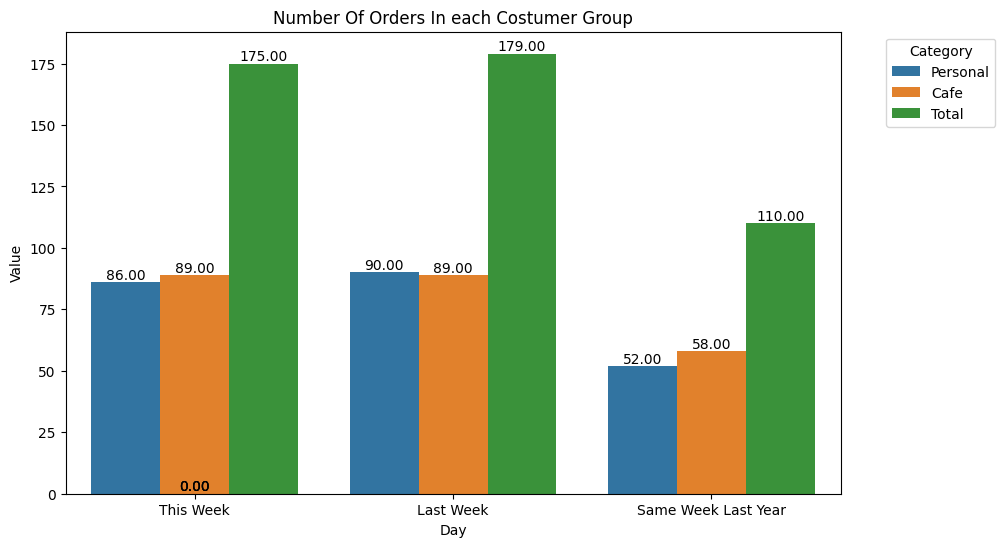

In [29]:
import matplotlib.pyplot as plt
import pandas as pd

# Sample data
personal_order_this_week = len(set(this_week_df[this_week_df["كد گروه مشتري"]==1]["شماره"].to_list()))
cafe_order_this_week = len(set(this_week_df[this_week_df["كد گروه مشتري"]==2]["شماره"].to_list()))

personal_order_last_week = len(set(last_week_df[last_week_df["كد گروه مشتري"]==1]["شماره"].to_list()))
cafe_order_last_week = len(set(last_week_df[last_week_df["كد گروه مشتري"]==2]["شماره"].to_list()))

personal_order_last_year = len(set(last_year_week_df[last_year_week_df["كد گروه مشتري"]==1]["شماره"].to_list()))
cafe_order_last_year = len(set(last_year_week_df[last_year_week_df["كد گروه مشتري"]==2]["شماره"].to_list()))

days = ["This Week", "Last Week", "Same Week Last Year"]
categories = ['Personal', 'Cafe', 'Total']
data = {'days': days,
        'Personal': [personal_order_this_week, personal_order_last_week, personal_order_last_year],
        'Cafe': [cafe_order_this_week, cafe_order_last_week, cafe_order_last_year],
        'Total': [personal_order_this_week+cafe_order_this_week, personal_order_last_week+cafe_order_last_week, 
                  personal_order_last_year+ cafe_order_last_year]}

# Create a DataFrame
df = pd.DataFrame(data)

# Convert the data to long format
df_long = df.melt(id_vars='days', var_name='category', value_name='value')

# Create the bar plot
plt.figure(figsize=(10, 6))
barplot = sns.barplot(data=df_long, x='days', y='value', hue='category')

# Add exact value labels at the top of each bar
for p in barplot.patches:
    barplot.annotate(format(p.get_height(), '.2f'), 
                     (p.get_x() + p.get_width() / 2., p.get_height()), 
                     ha = 'center', va = 'center', 
                     xytext = (0, 5), 
                     textcoords = 'offset points')

# Show the plot
plt.title('Number Of Orders In each Costumer Group')
plt.xlabel('Day')
plt.ylabel('Value')
plt.legend(title='Category', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

### Each Series Sale Per Line (This Week)

In [30]:
def each_line(df,series,string):  
    series_dict = {}
    for i in df[df["گروه فروش"]== series]["كالا/خدمت"].value_counts().to_dict().keys():
        df_2 = df[df["كالا/خدمت"]== i]
        sum_line = sum(df_2["مقدار-فرعي"].to_list()) / 1000
        series_dict[f"{i}"] = sum_line


    x = list(series_dict.keys())
    y = list(series_dict.values())

    # Create a ColumnDataSource
    colors = ["#"+''.join([random.choice('0123456789ABCDEF') for j in range(6)]) for i in range(len(x))]
    source = ColumnDataSource(data=dict(x=x, y=y, color=colors))

    # Create the figure
    p = figure(x_range=x, height=600, width=1000 ,title=f"{series} Sale {string}",
            toolbar_location=None, tools="")

    # Render the bars
    p.vbar(x='x', top='y', width=0.5, source=source, color="color")
    

    # Customize the plot
    p.xgrid.grid_line_color = None
    p.y_range.start = 0
    p.xaxis.major_label_orientation = 45  # Adjust the angle of the x-axis labels


    # Show the plot
    output_notebook()
    show(p)

each_line(this_week_df,"V Series", "This Week")
each_line(last_week_df,"V Series", "Last Week")
each_line(last_year_week_df,"V Series", "Last Year This Week")


each_line(this_week_df,"A Series", "This Week")
each_line(last_week_df, "A Series", "Last Week")
each_line(last_year_week_df,"A Series", "Last Year This Week")


each_line(this_week_df,"X Series", "This Week")
each_line(last_week_df, "X Series", "Last Week")
each_line(last_year_week_df,"X Series", "Last Year This Week")


Loading BokehJS ...

Loading BokehJS ...

Loading BokehJS ...

Loading BokehJS ...

Loading BokehJS ...

Loading BokehJS ...

Loading BokehJS ...

Loading BokehJS ...

Loading BokehJS ...

### Each City

In [25]:

def top_city(sale, string):
    city = sale["شهر"].value_counts().to_dict()
    total_sale = sum(sale["خالص"].to_list())
    total_kg_sale = round((sum(sale["مقدار-فرعي"].to_list())) / 1000,3)
    city_dict = {}
    for i in city.keys():
        series_df = sale[sale["شهر"] == i]
        # their Total KG
        kg = round(sum(series_df["مقدار-فرعي"].to_list()) / 1000,2)
        # their Total Rial
        bought = sum(series_df["خالص"].tolist())
        # adding the values to a dict
        city_dict[i] = {"kg" : kg, "Total_Sale": bought}
    top_city = sorted(city_dict, key=lambda k: city_dict[k]['kg'], reverse=True)[:11]
    top_city_dict = {}
    for i in top_city:
        top_city_dict[i] = city_dict[i]["kg"]


    # plot the output
    x = list(top_city_dict.keys())
    y = list(top_city_dict.values())

    # Create a ColumnDataSource
    colors = ["#"+''.join([random.choice('0123456789ABCDEF') for j in range(6)]) for i in range(len(x))]
    source = ColumnDataSource(data=dict(x=x, y=y, color=colors))

    # Create the figure
    p = figure(x_range=x, height=600, width=1000 ,title= f"Top Sale City {string}",
            toolbar_location=None, tools="")

    # Render the bars
    p.vbar(x='x', top='y', width=0.5, source=source, color="color")

    # Customize the plot
    p.xgrid.grid_line_color = None
    p.y_range.start = 0
    p.xaxis.major_label_orientation = 45  # Adjust the angle of the x-axis labels


    # Show the plot
    output_notebook()
    show(p)
    print(top_city_dict)
top_city(this_week_df, "This Week")
top_city(last_week_df, "Last Week")
top_city(last_year_week_df, "Last Year This Week")




Loading BokehJS ...

{'تهران': nan, 'قم': 85.07, 'بندرعباس': 75.15, 'مشهد': 35.0, 'كرج': 34.55, 'اروميه': 25.65, 'تبريز': 21.7, 'لواسانات': 16.6, 'شيراز': 16.0, 'گلپايگان': 12.15, 'لاهيجان': 10.95}


Loading BokehJS ...

{'تهران': nan, 'شيراز': 73.25, 'كرج': 49.9, 'اروميه': 46.58, 'مشهد': 23.3, 'بندرعباس': 21.44, 'زاهدان': 20.23, 'تبريز': 13.22, 'قم': nan, 'كيش': 20.0, 'بوشهر': 6.75}


Loading BokehJS ...

{'تهران': 369.3, 'شيراز': 104.15, 'قم': 66.0, 'مشهد': 64.0, 'اصفهان': 38.8, 'بندرعباس': 23.5, 'كرمان': 21.0, 'كرج': 17.2, 'كيش': 16.0, 'زنجان': 12.5, 'قائم شهر': 12.0}


### Top Cafe Buy

In [31]:
def top_cafe(df,string):
    cafe_buy_dict = {}
    cafe_list = set(df[df["كد گروه مشتري"] == 2]["كد مشتري"].to_list())
    for i in cafe_list:
        kg = sum(df[df["كد مشتري"] == i]["مقدار-فرعي"].to_list())/1000
        cafe_buy_dict[i] = {"name": df[df["كد مشتري"] == i]["مشتري"].to_list()[0],
                        "kg": kg }
    sorted_cafe = sorted(cafe_buy_dict, key=lambda k: cafe_buy_dict[k]['kg'], reverse=True)[:11]
    top_cafe_dict = {}
    for i in sorted_cafe:
        top_cafe_dict[cafe_buy_dict[i]["name"]] = cafe_buy_dict[i]["kg"]

    # plot the output
    x = list(top_cafe_dict.keys())
    y = list(top_cafe_dict.values())

    # Create a ColumnDataSource
    colors = ["#"+''.join([random.choice('0123456789ABCDEF') for j in range(6)]) for i in range(len(x))]
    source = ColumnDataSource(data=dict(x=x, y=y, color=colors))

    # Create the figure
    p = figure(x_range=x, height=600, width=1000 ,title= f"Top Sale Cafe {string}",
            toolbar_location=None, tools="")

    # Render the bars
    p.vbar(x='x', top='y', width=0.5, source=source, color="color")

    # Customize the plot
    p.xgrid.grid_line_color = None
    p.y_range.start = 0
    p.xaxis.major_label_orientation = 45  # Adjust the angle of the x-axis labels


    # Show the plot
    output_notebook()
    show(p)

top_cafe(this_week_df, "This Week")
top_cafe(last_week_df, "Last Week")
top_cafe(last_year_week_df, "Last Year This Week")


Loading BokehJS ...

Loading BokehJS ...

Loading BokehJS ...

### In a Glimpse

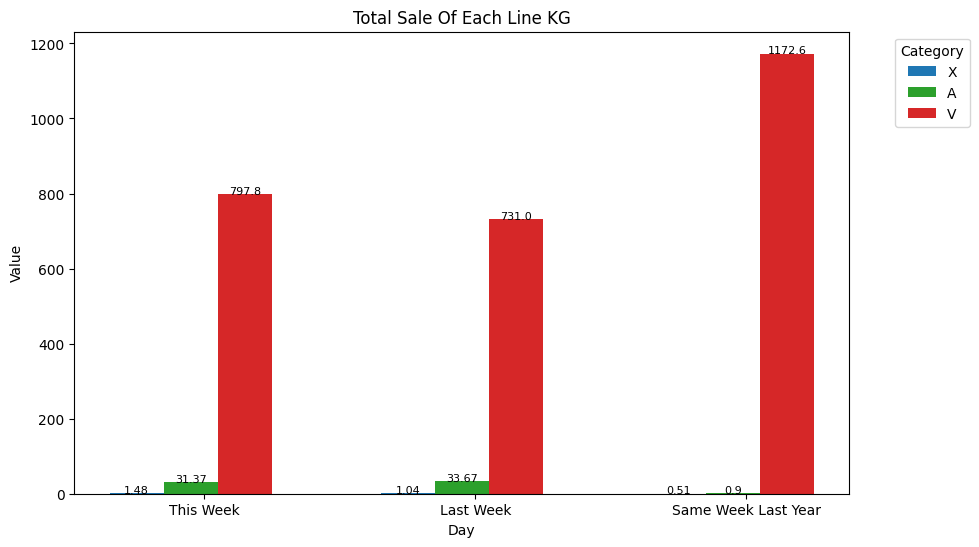

In [9]:
import matplotlib.cm as cm
import matplotlib.colors as mcolors

this_week_v_kg = sum(this_week_df[this_week_df["گروه فروش"]== "V Series"]["مقدار-فرعي"].to_list())/1000
last_week_v_kg = sum(last_week_df[last_week_df["گروه فروش"]== "V Series"]["مقدار-فرعي"].to_list())/1000
last_year_week_v_kg = sum(last_year_week_df[last_year_week_df["گروه فروش"]== "V Series"]["مقدار-فرعي"].to_list())/1000

this_week_a_kg = sum(this_week_df[this_week_df["گروه فروش"]== "A Series"]["مقدار-فرعي"].to_list())/1000
last_week_a_kg = sum(last_week_df[last_week_df["گروه فروش"]== "A Series"]["مقدار-فرعي"].to_list())/1000
last_year_week_a_kg = sum(last_year_week_df[last_year_week_df["گروه فروش"]== "A Series"]["مقدار-فرعي"].to_list())/1000

this_week_x_kg = sum(this_week_df[this_week_df["گروه فروش"]== "X Series"]["مقدار-فرعي"].to_list())/1000
last_week_x_kg = sum(last_week_df[last_week_df["گروه فروش"]== "X Series"]["مقدار-فرعي"].to_list())/1000
last_year_week_x_kg = sum(last_year_week_df[last_year_week_df["گروه فروش"]== "X Series"]["مقدار-فرعي"].to_list())/1000


days = ["This Week", "Last Week", "Same Week Last Year"]
categories = ['X', 'A', 'V',]
data = {'days': days,
        'X': [this_week_x_kg, last_week_x_kg, last_year_week_x_kg],
        'A': [this_week_a_kg, last_week_a_kg, last_year_week_a_kg],
        'V': [this_week_v_kg, last_week_v_kg, last_year_week_v_kg]}

df = pd.DataFrame(data)

fig, ax = plt.subplots(figsize=(10, 6))

# Define the custom colormap
colors = ['tab:blue', 'tab:green', 'tab:red']
cmap = mcolors.ListedColormap(colors)

# Render the bars
for i, category in enumerate(categories):
    height = df[category]
    ax.bar(x=[j + i * 0.2 - 0.25 for j in range(len(days))], height=height, width=0.2, label=category, color=cmap(i))

# Add exact value labels on each bar
for i, category in enumerate(categories):
    for j, value in enumerate(df[category]):
        ax.text(j + i * 0.2 - 0.25, value + 0.1, str(value), ha='center', fontsize=8)

# Customize the plot
ax.set_xticks(range(len(days)))
ax.set_xticklabels(days)
ax.set_title('Total Sale Of Each Line KG')
ax.set_xlabel('Day')
ax.set_ylabel('Value')
ax.legend(title='Category', bbox_to_anchor=(1.05, 1), loc='upper left')

# Show the plot
plt.show()


## Cummulative 

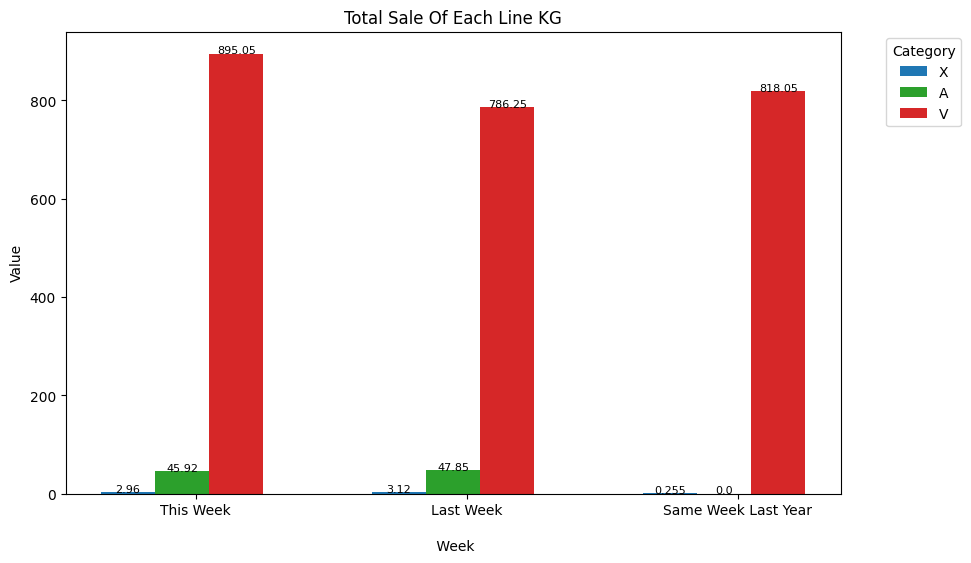

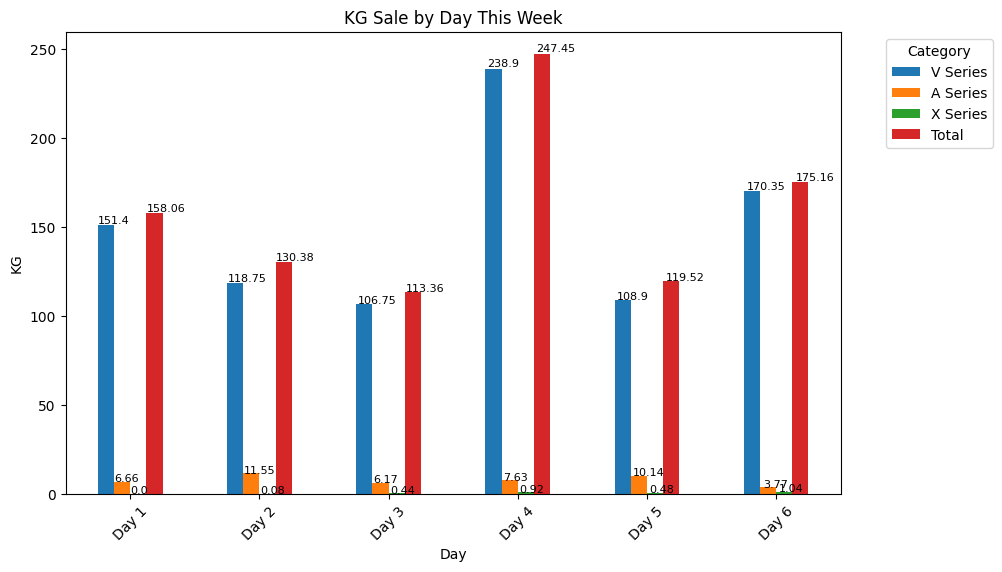

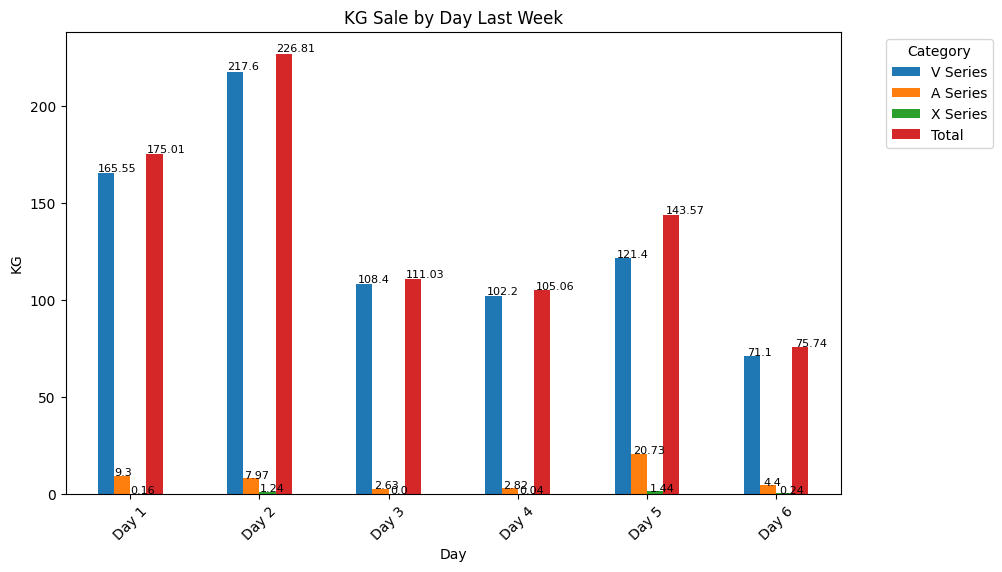

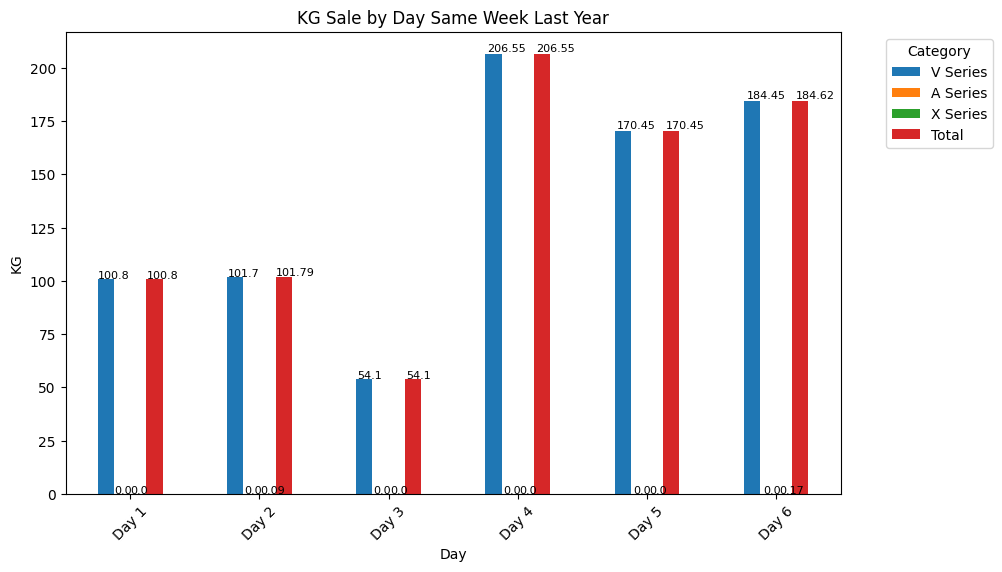

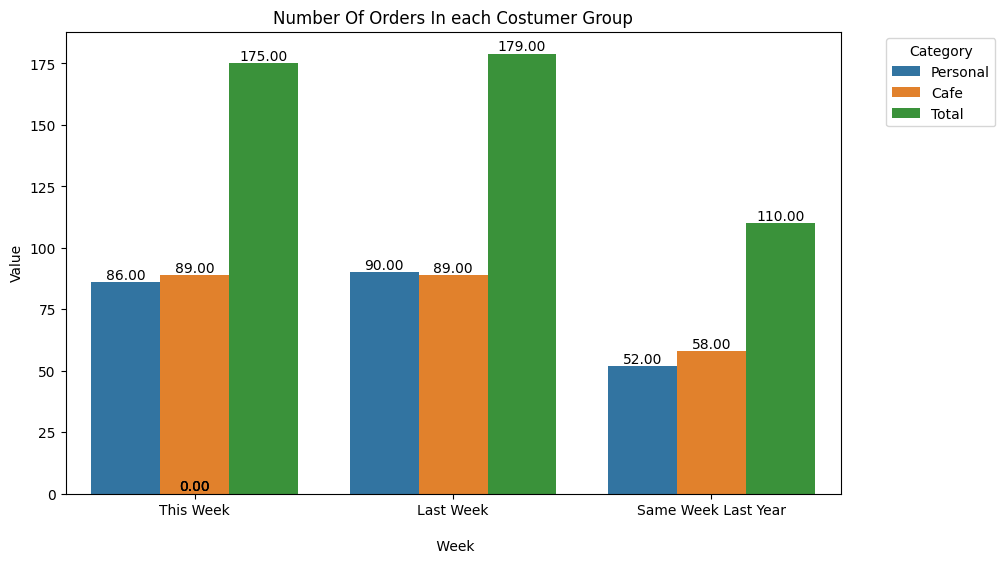

Loading BokehJS ...

Loading BokehJS ...

Loading BokehJS ...

Loading BokehJS ...

Loading BokehJS ...

Loading BokehJS ...

Loading BokehJS ...

Loading BokehJS ...

Loading BokehJS ...

Loading BokehJS ...

Loading BokehJS ...

Loading BokehJS ...

Loading BokehJS ...

Loading BokehJS ...

Loading BokehJS ...

In [6]:
import pandas as pd
import re
import openpyxl
from collections import Counter
import matplotlib.pyplot as plt
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.ticker as ticker
from bokeh.plotting import figure, show
from bokeh.io import output_notebook
from bokeh.models import Label
from bokeh.models import ColumnDataSource
from bokeh.transform import dodge
from bokeh.io import output_notebook
from bokeh.models import NumeralTickFormatter
import jdatetime
import pandas as pd
import random
from bokeh.plotting import figure, show
from bokeh.io import output_notebook
from bokeh.models import ColumnDataSource
from bokeh.transform import dodge
from bokeh.io import output_file, save
import seaborn as sns
from bokeh.io import export_png
import matplotlib.cm as cm
import matplotlib.colors as mcolors




sale = pd.read_excel("/Users/mohammad/XAV/Departemant Sale/Project / فروش 1400.xlsx", sheet_name="فروش")
city_1402_df = pd.read_excel("/Users/mohammad/XAV/Departemant Sale/Project /طرف حساب 1402.xlsx")
sale_1402 = pd.read_excel("/Users/mohammad/XAV/Departemant Sale/Project /فروش نيمه اول 1402.xlsx", sheet_name="فروش")
sale_1401 = pd.read_excel("/Users/mohammad/XAV/Departemant Sale/Project /فروش 1401.xlsx", sheet_name="فروش")
sale_1400 = pd.read_excel("/Users/mohammad/XAV/Departemant Sale/Project / فروش 1400.xlsx", sheet_name="فروش")

sale_1400["مقدار-فرعي"].fillna(0, inplace=True)
sale_1401["مقدار-فرعي"].fillna(0, inplace=True)
sale_1402["مقدار-فرعي"].fillna(0, inplace=True)



# adding Day and Week to Df
def persian_week(df):
    # df = df.fillna(0, inplace=True)
    df["week"] = None
    for i in range(len(df)):
        mah = int(df.loc[i,"ماه"])
        rooz = int(df.loc[i,"تاريخ"][-2:])

        # Farvardin
        if mah == 1:
            if rooz<=7 :
                df.loc[i,"week"] = 1 
            elif rooz >= 8 and rooz <= 14:
                df.loc[i,"week"] = 2 

            elif rooz >= 15 and rooz<=21:
                df.loc[i,"week"] = 3 

            elif rooz >= 22 and rooz <=28:
                df.loc[i,"week"] = 4 

            elif rooz >=29:
                df.loc[i,"week"] = 5

        # Ordibehesht
        elif mah == 2:
            if rooz <= 4:
                df.loc[i,"week"] = 5

            elif rooz >= 5 and rooz<= 11:
                df.loc[i,"week"] = 6

            elif rooz >=12 and rooz<=18:
                df.loc[i,"week"] = 7

            elif rooz >=19 and rooz <=25:
                df.loc[i,"week"] = 8

            elif rooz>=26:
                df.loc[i,"week"] = 9 

        # Khordad
        elif mah == 3:
            if rooz == 1:
                df.loc[i,"week"] = 9

            elif rooz >=2 and rooz<=8:
                df.loc[i,"week"] = 10

            elif rooz>= 9 and rooz <= 15:
                df.loc[i,"week"] = 11

            elif rooz >= 16 and rooz <= 22:
                df.loc[i,"week"] = 12

            elif rooz >= 23 and rooz <= 29:
                df.loc[i,"week"] = 13

            elif rooz>=30:
                df.loc[i,"week"] = 14

        # Tir
        elif mah == 4:
            if rooz<= 5 :
                df.loc[i,"week"] = 14

            elif rooz >= 6 and rooz <= 12 :
                df.loc[i,"week"] = 15

            elif rooz>=13 and rooz <= 19:
                df.loc[i,"week"] = 16

            elif rooz >=20  and rooz<= 26:
                df.loc[i,"week"] = 17

            elif rooz>= 27:
                df.loc[i,"week"] = 18

        # Mordad
        elif mah == 5:
            if rooz <= 2 :
                df.loc[i,"week"] = 18   

            elif rooz >= 3 and rooz<= 9:
                df.loc[i,"week"] = 19

            elif rooz >=10 and rooz<= 16:
                df.loc[i,"week"] = 20

            elif rooz >= 17 and rooz <= 23:
                df.loc[i,"week"] = 21

            elif rooz >= 24 and rooz <= 30:
                df.loc[i,"week"] = 22

            elif rooz == 31 :
                df.loc[i,"week"] = 23

        # Shahrivar 
        elif mah == 6 :
            if rooz <= 6 :
                df.loc[i,"week"] = 23

            elif rooz >= 7 and rooz <= 13:
                df.loc[i,"week"] = 24

            elif rooz >= 14 and rooz<= 20 :
                df.loc[i,"week"] = 25

            elif rooz >= 21 and rooz <= 27:
                df.loc[i,"week"] =   26

            elif rooz >=28:
                df.loc[i,"week"] = 27


        # Mehr 
        elif mah == 7 :
            if rooz <= 3:
                df.loc[i,"week"] = 27

            elif rooz >= 4 and rooz <= 10:
                df.loc[i,"week"] = 28
        
            elif rooz >= 11 and rooz <= 17:
                df.loc[i,"week"] = 29

            elif rooz >= 18 and rooz <= 24:
                df.loc[i,"week"] = 30

            elif rooz >= 25:
                df.loc [i,"week"] = 31

        # Aban
        elif mah == 8:
            if rooz == 1:
                df.loc[i,"week"] = 31

            elif rooz >=2 and rooz<=8:
                df.loc[i,"week"] = 32

            elif rooz>= 9 and rooz <= 15:
                df.loc[i,"week"] = 33

            elif rooz >= 16 and rooz <= 22:
                df.loc[i,"week"] = 34

            elif rooz >= 23 and rooz <= 29:
                df.loc[i,"week"] = 35

            elif rooz>=30:
                df.loc[i,"week"] = 36


        #  Azar
        elif mah == 9:
            if rooz <= 6 :
                df.loc[i,"week"] = 36

            elif rooz >= 7 and rooz <= 13:
                df.loc[i,"week"] = 37

            elif rooz >= 14 and rooz<= 20 :
                df.loc[i,"week"] = 38

            elif rooz >= 21 and rooz <= 27:
                df.loc[i,"week"] =   39

            elif rooz >=28:
                df.loc[i,"week"] = 40

        # Dey
        elif mah == 10:
            if rooz <= 4:
                df.loc[i,"week"] = 40

            elif rooz >= 5 and rooz<= 11:
                df.loc[i,"week"] = 41

            elif rooz >=12 and rooz<=18:
                df.loc[i,"week"] = 42

            elif rooz >=19 and rooz <=25:
                df.loc[i,"week"] = 43

            elif rooz>=26:
                df.loc[i,"week"] = 44

        # Bahman
        elif mah == 11:
            if rooz <= 2 :
                df.loc[i,"week"] = 44   

            elif rooz >= 3 and rooz<= 9:
                df.loc[i,"week"] = 45

            elif rooz >=10 and rooz<= 16:
                df.loc[i,"week"] = 46

            elif rooz >= 17 and rooz <= 23:
                df.loc[i,"week"] = 47

            elif rooz >= 24 and rooz <= 30:
                df.loc[i,"week"] = 48


        elif mah == 12:
            if rooz <= 7 :
                df.loc[i,"week"] = 49

            elif rooz >= 8 and rooz<= 14:
                df.loc[i,"week"] = 50

            elif rooz >= 15 and rooz <=21 :
                df.loc[i,"week"] = 51

            else:
                df.loc[i,"week"] = 52 

    return df

sale_1400 = persian_week(sale_1400)
sale_1401 = persian_week(sale_1401)
sale_1402 = persian_week(sale_1402)



# renaming Goods

def extract_persian_name(input_string):
    persian_pattern = r'[\u0600-\u06FF\s]+'
    persian_name = re.findall(persian_pattern, input_string)
    persian_name = ' '.join(persian_name)
    return persian_name

# Apply the function to each row of the name column
sale_1400['كالا/خدمت'] = sale_1400['كالا/خدمت'].apply(extract_persian_name)
sale_1401['كالا/خدمت'] = sale_1401['كالا/خدمت'].apply(extract_persian_name)
sale_1402['كالا/خدمت'] = sale_1402['كالا/خدمت'].apply(extract_persian_name)


def modify_string(text):
    if isinstance(text, str) and "مركزي" in text:
        modified_text = text.replace("مركزي", "").split()
        modified_text = " ".join(modified_text)
        return modified_text
    else:
        return text
city_1402_df["شهر"] = city_1402_df["شهر"].apply(modify_string)

def city(sale,city_df): 
    city_dict = {}
    for i in range(len(city_df)):
        code = city_df.loc[i, "كد"]
        customer_city = city_df.loc[i, "شهر"]
        city_dict[code] = customer_city

    sale["شهر"] = None
    for i in range(len(sale)):
        try:
            code = sale.loc[i, "كد مشتري"]
            sale.loc[i,"شهر"] = city_dict[code]
        except:
            continue
    return sale

sale_1400 = city(sale_1400, city_1402_df)
sale_1401 = city(sale_1401, city_1402_df)
sale_1402 = city(sale_1402, city_1402_df)


week_number = int(input("Which week do you want to get report?  "))
last_week_number = week_number - 1

this_week_df = sale_1402[sale_1402["week"] == week_number]
last_week_df = sale_1402[sale_1402["week"] == last_week_number]
last_year_week_df = sale_1401[sale_1401["week"]== week_number]


this_week_v_kg = sum(this_week_df[this_week_df["گروه فروش"]== "V Series"]["مقدار-فرعي"].to_list())/1000
last_week_v_kg = sum(last_week_df[last_week_df["گروه فروش"]== "V Series"]["مقدار-فرعي"].to_list())/1000
last_year_week_v_kg = sum(last_year_week_df[last_year_week_df["گروه فروش"]== "V Series"]["مقدار-فرعي"].to_list())/1000

this_week_a_kg = sum(this_week_df[this_week_df["گروه فروش"]== "A Series"]["مقدار-فرعي"].to_list())/1000
last_week_a_kg = sum(last_week_df[last_week_df["گروه فروش"]== "A Series"]["مقدار-فرعي"].to_list())/1000
last_year_week_a_kg = sum(last_year_week_df[last_year_week_df["گروه فروش"]== "A Series"]["مقدار-فرعي"].to_list())/1000

this_week_x_kg = sum(this_week_df[this_week_df["گروه فروش"]== "X Series"]["مقدار-فرعي"].to_list())/1000
last_week_x_kg = sum(last_week_df[last_week_df["گروه فروش"]== "X Series"]["مقدار-فرعي"].to_list())/1000
last_year_week_x_kg = sum(last_year_week_df[last_year_week_df["گروه فروش"]== "X Series"]["مقدار-فرعي"].to_list())/1000


days = ["This Week", "Last Week", "Same Week Last Year"]
categories = ['X', 'A', 'V',]
data = {'days': days,
        'X': [this_week_x_kg, last_week_x_kg, last_year_week_x_kg],
        'A': [this_week_a_kg, last_week_a_kg, last_year_week_a_kg],
        'V': [this_week_v_kg, last_week_v_kg, last_year_week_v_kg]}



this_week_v_kg = sum(this_week_df[this_week_df["گروه فروش"]== "V Series"]["مقدار-فرعي"].to_list())/1000
last_week_v_kg = sum(last_week_df[last_week_df["گروه فروش"]== "V Series"]["مقدار-فرعي"].to_list())/1000
last_year_week_v_kg = sum(last_year_week_df[last_year_week_df["گروه فروش"]== "V Series"]["مقدار-فرعي"].to_list())/1000

this_week_a_kg = sum(this_week_df[this_week_df["گروه فروش"]== "A Series"]["مقدار-فرعي"].to_list())/1000
last_week_a_kg = sum(last_week_df[last_week_df["گروه فروش"]== "A Series"]["مقدار-فرعي"].to_list())/1000
last_year_week_a_kg = sum(last_year_week_df[last_year_week_df["گروه فروش"]== "A Series"]["مقدار-فرعي"].to_list())/1000

this_week_x_kg = sum(this_week_df[this_week_df["گروه فروش"]== "X Series"]["مقدار-فرعي"].to_list())/1000
last_week_x_kg = sum(last_week_df[last_week_df["گروه فروش"]== "X Series"]["مقدار-فرعي"].to_list())/1000
last_year_week_x_kg = sum(last_year_week_df[last_year_week_df["گروه فروش"]== "X Series"]["مقدار-فرعي"].to_list())/1000


days = ["This Week", "Last Week", "Same Week Last Year"]
categories = ['X', 'A', 'V',]
data = {'days': days,
        'X': [this_week_x_kg, last_week_x_kg, last_year_week_x_kg],
        'A': [this_week_a_kg, last_week_a_kg, last_year_week_a_kg],
        'V': [this_week_v_kg, last_week_v_kg, last_year_week_v_kg]}

df = pd.DataFrame(data)

fig, ax = plt.subplots(figsize=(10, 6))

# Define the custom colormap
colors = ['tab:blue', 'tab:green', 'tab:red']
cmap = mcolors.ListedColormap(colors)

# Render the bars
for i, category in enumerate(categories):
    height = df[category]
    ax.bar(x=[j + i * 0.2 - 0.25 for j in range(len(days))], height=height, width=0.2, label=category, color=cmap(i))

# Add exact value labels on each bar
for i, category in enumerate(categories):
    for j, value in enumerate(df[category]):
        ax.text(j + i * 0.2 - 0.25, value + 0.1, str(value), ha='center', fontsize=8)

# Customize the plot
ax.set_xticks(range(len(days)))
ax.set_xticklabels(days)
ax.set_title('Total Sale Of Each Line KG')
ax.set_xlabel('\n Week')
ax.set_ylabel('Value')
ax.legend(title='Category', bbox_to_anchor=(1.05, 1), loc='upper left')

# Show the plot
plt.show()


def each_day(week_df, string):
    day = 1
    day_dict = {}
    for i in set(week_df["تاريخ"].to_list()):
        df = week_df[week_df["تاريخ"]== i]
        sum_v = round(sum(df[df["گروه فروش"]== "V Series"]["مقدار-فرعي"].to_list())/1000,2)
        sum_a = round(sum(df[df["گروه فروش"]== "A Series"]["مقدار-فرعي"].to_list())/1000,2)
        sum_x = round(sum(df[df["گروه فروش"]== "X Series"]["مقدار-فرعي"].to_list())/1000,2)
        day_dict[f"Day {day}"] = {"V Series": sum_v, "A Series": sum_a, "X Series": sum_x, "Total": round(sum_x+sum_a+sum_v,2)}
        day+=1

# Sample data
    # data = {
    #     'days': ['Day 1', 'Day 2', 'Day 3', 'Day 4', 'Day 5'] * 4,
    #     'category': ['X', 'A', 'V', 'Total'] * 5,
    #     'revenue': [day_dict["Day 1"]["X Series"], day_dict["Day 1"]["A Series"], day_dict["Day 1"]["V Series"], day_dict["Day 1"]["Total"],
    #                  day_dict["Day 2"]["X Series"], day_dict["Day 2"]["A Series"], day_dict["Day 2"]["V Series"], day_dict["Day 2"]["Total"],
    #                    day_dict["Day 3"]["X Series"], day_dict["Day 3"]["A Series"], day_dict["Day 3"]["V Series"], day_dict["Day 3"]["Total"],
    #                      day_dict["Day 4"]["X Series"], day_dict["Day 4"]["A Series"], day_dict["Day 4"]["V Series"], day_dict["Day 4"]["Total"],
    #                        day_dict["Day 5"]["X Series"], day_dict["Day 5"]["A Series"], day_dict["Day 5"]["V Series"], day_dict["Day 5"]["Total"]]
    # }

    # Create a pivot table to reshape the data for plotting
    df = pd.DataFrame(day_dict).T

    # Create the bar plot
    fig, ax = plt.subplots(figsize=(10, 6))
    df.plot(kind='bar', stacked=False, ax=ax)

    # Add exact revenue values as labels with smaller font size
    for p in ax.patches:
        ax.annotate(str(p.get_height()), (p.get_x() * 1.005, p.get_height() * 1.005), fontsize=8)

    # Customize the plot
    plt.title(f'KG Sale by Day {string}')
    plt.xlabel('Day')
    plt.ylabel('KG')
    plt.legend(title='Category', bbox_to_anchor=(1.05, 1), loc='upper left')
    plt.xticks(rotation=45)


    # Show the plot
    plt.show()


each_day(this_week_df, "This Week")
each_day(last_week_df, "Last Week")
each_day(last_year_week_df, "Same Week Last Year")







personal_order_this_week = len(set(this_week_df[this_week_df["كد گروه مشتري"]==1]["شماره"].to_list()))
cafe_order_this_week = len(set(this_week_df[this_week_df["كد گروه مشتري"]==2]["شماره"].to_list()))

personal_order_last_week = len(set(last_week_df[last_week_df["كد گروه مشتري"]==1]["شماره"].to_list()))
cafe_order_last_week = len(set(last_week_df[last_week_df["كد گروه مشتري"]==2]["شماره"].to_list()))

personal_order_last_year = len(set(last_year_week_df[last_year_week_df["كد گروه مشتري"]==1]["شماره"].to_list()))
cafe_order_last_year = len(set(last_year_week_df[last_year_week_df["كد گروه مشتري"]==2]["شماره"].to_list()))

days = ["This Week", "Last Week", "Same Week Last Year"]
categories = ['Personal', 'Cafe', 'Total']
data = {'days': days,
        'Personal': [personal_order_this_week, personal_order_last_week, personal_order_last_year],
        'Cafe': [cafe_order_this_week, cafe_order_last_week, cafe_order_last_year],
        'Total': [personal_order_this_week+cafe_order_this_week, personal_order_last_week+cafe_order_last_week, 
                  personal_order_last_year+ cafe_order_last_year]}

# Create a DataFrame
df = pd.DataFrame(data)

# Convert the data to long format
df_long = df.melt(id_vars='days', var_name='category', value_name='value')

# Create the bar plot
plt.figure(figsize=(10, 6))
barplot = sns.barplot(data=df_long, x='days', y='value', hue='category')

# Add exact value labels at the top of each bar
for p in barplot.patches:
    barplot.annotate(format(p.get_height(), '.2f'), 
                     (p.get_x() + p.get_width() / 2., p.get_height()), 
                     ha = 'center', va = 'center', 
                     xytext = (0, 5), 
                     textcoords = 'offset points')

# Show the plot
plt.title('Number Of Orders In each Costumer Group')
plt.xlabel('\n Week')
plt.ylabel('Value')
plt.legend(title='Category', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()



def each_line(df, series, string):  
    series_dict = {}
    for i in df[df["گروه فروش"] == series]["كالا/خدمت"].value_counts().to_dict().keys():
        df_2 = df[df["كالا/خدمت"] == i]
        sum_line = sum(df_2["مقدار-فرعي"].to_list()) / 1000
        series_dict[f"{i}"] = sum_line

    x = list(series_dict.keys())
    y = list(series_dict.values())

    # Create a ColumnDataSource
    colors = ["#" + ''.join([random.choice('0123456789ABCDEF') for j in range(6)]) for i in range(len(x))]
    source = ColumnDataSource(data=dict(x=x, y=y, color=colors))

    # Create the figure
    p = figure(x_range=x, height=600, width=1000, title=f"{series} Sale {string}", toolbar_location=None, tools="")

    # Render the bars
    p.vbar(x='x', top='y', width=0.5, source=source, color="color")

    # Add exact value labels on top of the bars
    label_font_size = '7pt'  # Set the desired font size here
    if len(x) == 1:
        x_offset = 350
    elif len(x) == 2:
        x_offset = 220
    elif len(x) == 3 or 4:
        x_offset = 70
    elif len(x) == 5 or 6:
        x_offset = 55
    elif len(x) == 7 or 8:
        x_offset = 40
    elif len(x) == 9 or 10:
        x_offset= 25
    elif len(x)>10:
        x_offset=2
    

    
    y_offset = 10  # Set the desired y offset here

    for i, value in enumerate(y):
        label = Label(x=i, y=value, text=str(round(value, 2)), text_baseline='middle', text_align='center', text_font_size=label_font_size, x_offset=x_offset, y_offset=y_offset)
        p.add_layout(label)

    # Customize the plot
    p.xgrid.grid_line_color = None
    p.y_range.start = 0
    p.xaxis.major_label_orientation = 45  # Adjust the angle of the x-axis labels

    # Show the plot
    output_notebook()
    show(p)



each_line(this_week_df, "V Series", "This Week")
each_line(last_week_df, "V Series", "Last Week")
each_line(last_year_week_df, "V Series", "Last Year This Week")

each_line(this_week_df, "A Series", "This Week")
each_line(last_week_df, "A Series", "Last Week")
each_line(last_year_week_df, "A Series", "Last Year This Week")

each_line(this_week_df, "X Series", "This Week")
each_line(last_week_df, "X Series", "Last Week")
each_line(last_year_week_df, "X Series", "Last Year This Week")





def top_city(sale, string):
    city = sale["شهر"].value_counts().to_dict()
    total_sale = sum(sale["خالص"].to_list())
    total_kg_sale = round((sum(sale["مقدار-فرعي"].to_list())) / 1000,3)

    city_dict = {}
    for i in city.keys():
        try:
            series_df = sale[sale["شهر"] == i]
            # their Total KG
            kg = round(sum(series_df["مقدار-فرعي"].to_list()) / 1000,2)
            # their Total Rial
            bought = sum(series_df["خالص"].tolist())
            # adding the values to a dict
            city_dict[i] = {"kg" : kg, "Total_Sale": bought}
        except:
            continue
    top_city = sorted(city_dict, key=lambda k: city_dict[k]['kg'], reverse=True)[:11]
    top_city_dict = {}
    for i in top_city:
        top_city_dict[i] = city_dict[i]["kg"]


    # plot the output
    x = list(top_city_dict.keys())
    y = list(top_city_dict.values())

    # Create a ColumnDataSource
    colors = ["#"+''.join([random.choice('0123456789ABCDEF') for j in range(6)]) for i in range(len(x))]
    source = ColumnDataSource(data=dict(x=x, y=y, color=colors))

    # Create the figure
    p = figure(x_range=x, height=600, width=1000 ,title= f"Top Sale City {string}",
            toolbar_location=None, tools="")

    # Render the bars
    p.vbar(x='x', top='y', width=0.5, source=source, color="color")

    # Add exact value labels on top of the bars
    label_font_size = '6pt'  # Set the desired font size here
    x_offset = 40  # Set the desired x offset here
    y_offset = 10  # Set the desired y offset here

    for i, value in enumerate(y):
        label = Label(x=i, y=value, text=str(value) + f"  ({round((value/total_kg_sale)*100,2)}%)", text_baseline='middle', text_align='center',
                       text_font_size=label_font_size, x_offset=x_offset, y_offset=y_offset)
        p.add_layout(label)

    # Customize the plot
    p.xgrid.grid_line_color = None
    p.y_range.start = 0
    p.xaxis.major_label_orientation = 45  # Adjust the angle of the x-axis labels

    # Show the plot
    output_notebook()
    show(p)

top_city(this_week_df, "This Week")
top_city(last_week_df, "Last Week")
top_city(last_year_week_df, "Last Year This Week")


def top_cafe(df,string):
    cafe_buy_dict = {}
    cafe_list = set(df[df["كد گروه مشتري"] == 2]["كد مشتري"].to_list())
    for i in cafe_list:
        kg = sum(df[df["كد مشتري"] == i]["مقدار-فرعي"].to_list())/1000
        cafe_buy_dict[i] = {"name": df[df["كد مشتري"] == i]["مشتري"].to_list()[0],
                        "kg": kg }
    sorted_cafe = sorted(cafe_buy_dict, key=lambda k: cafe_buy_dict[k]['kg'], reverse=True)[:11]
    top_cafe_dict = {}
    for i in sorted_cafe:
        top_cafe_dict[cafe_buy_dict[i]["name"]] = cafe_buy_dict[i]["kg"]

    # plot the output
    x = list(top_cafe_dict.keys())
    y = list(top_cafe_dict.values())

    # Create a ColumnDataSource
    colors = ["#"+''.join([random.choice('0123456789ABCDEF') for j in range(6)]) for i in range(len(x))]
    source = ColumnDataSource(data=dict(x=x, y=y, color=colors))

    # Create the figure
    p = figure(x_range=x, height=600, width=1000 ,title= f"Top Sale Cafe {string}",
            toolbar_location=None, tools="")
 
    # Render the bars
    p.vbar(x='x', top='y', width=0.5, source=source, color="color")

    # Customize the plot
    p.xgrid.grid_line_color = None
    p.y_range.start = 0
    p.xaxis.major_label_orientation = 45  # Adjust the angle of the x-axis labels
    for i, value in enumerate(y):
        label = Label(x=i, y=value, text=str(value), text_baseline='middle', text_align='center',text_font_size="7pt",
                      x_offset=40, y_offset= 10)
        p.add_layout(label)

    # Show the plot1
    output_notebook()
    show(p)



top_cafe(this_week_df, "This Week")
top_cafe(last_week_df, "Last Week")    
top_cafe(last_year_week_df, "Last Year This Week")
